In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

2.15.0


## Loading Data


| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [6]:
fmnist = keras.datasets.fashion_mnist

In [7]:
(training_images, training_labels), (testing_images, testing_labels) = fmnist.load_data()

In [8]:
len(training_images)

60000

LABEL: 1

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0  53 146 127 115 111 130 129 100 147 169 190   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 117 190 188 221 234 254 236 221 205 186 222   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 156 175 193 195 195 202 203 187 168 228  32   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 165 186 198 209 219 198 205 211 201 189 233  94   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 185 199 210 225 207 201 207 221 210 208 236 111   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 200 175 172 215 224 216 216 223 210 198 237 152   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7 213 156 151 171 187 215 227 212 200 178 215 177   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  25 201 136 156 178 198 213 235 168 166 163 207 178   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  42 195 134 162 

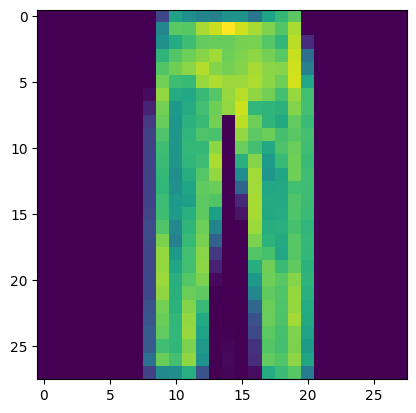

In [11]:
index = 16

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

### Modelling The Data

In [12]:
# Normalizing the Data
training_images = training_images / 255
testing_images = testing_images / 255

In [13]:
# Buidling the model
model = Sequential([
    tf.keras.layers.Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

## Training the Model

In [16]:
# Compiling the Model
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 8s 3ms/step - loss: 0.4906 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3703 - accuracy: 0.8680
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3349 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3111 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2954 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2799 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2670 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2581 - accuracy: 0.9025
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2449 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

In [17]:
# Evaluate the model on unseen data
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.8829


[0.3392488658428192, 0.8828999996185303]

## Testing the Model

In [19]:
classifications = model.predict(testing_images)

print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[8.08259593e-09 8.83499829e-10 7.09288128e-10 9.37925709e-11 6.03550676e-09 2.22926014e-04 1.11594034e-07 4.10893047e-03 1.73970278e-08 9.95668054e-01]


In [20]:
print(testing_labels[0])

9
